<a href="https://colab.research.google.com/github/Owino-Paul/Learn_Git/blob/master/Data_Visualization_With_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load the dataset into a data frame using Python.

In [96]:
# Importing python libraries for data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# loading data set to
df = pd.read_csv("Africa_climate_change.csv")

In [98]:
# Checking General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [99]:
# Checking for missing values
df.isnull().sum()

,0
DATE,0
PRCP,287240
TAVG,6376
TMAX,100914
TMIN,132058
COUNTRY,0


# 2. Clean the data as needed.

In [100]:
# Checking column data tyoes
df.dtypes

,0
DATE,object
PRCP,float64
TAVG,float64
TMAX,float64
TMIN,float64
COUNTRY,object


In [101]:
# standardize the column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)

Index(['date', 'prcp', 'tavg', 'tmax', 'tmin', 'country'], dtype='object')


In [102]:
# checking for duplicates using the dates feild
df.duplicated(subset=['date']).sum()

np.int64(448877)

In [103]:
print(df["date"].duplicated().sum())  # Count duplicate dates

448877


In [104]:
 # Count duplicates where both date & country match
df.duplicated(subset=['date', 'country']).sum()

np.int64(393992)

In [105]:
# sort values by date, tavg & coutry ascending order
df = df.sort_values(by=["date", "country", "tavg"], ascending=[True, True, False])

# dropping duplicates where both and country match
df = df.drop_duplicates(subset=["date", "country"], keep="first")

# view sum of duplicates sorted by date and country
print(df.duplicated(subset=["date", "country"]).sum())

# view general info
print(df.info())



0
<class 'pandas.core.frame.DataFrame'>
Index: 70823 entries, 20 to 464799
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     70823 non-null  object 
 1   prcp     26685 non-null  float64
 2   tavg     68631 non-null  float64
 3   tmax     46949 non-null  float64
 4   tmin     42964 non-null  float64
 5   country  70823 non-null  object 
dtypes: float64(4), object(2)
memory usage: 3.8+ MB
None


In [106]:
# fill remaing missing values with interpolation
df.interpolate(method="linear", inplace=True)


<ipython-input-106-572a1ffbe325>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method="linear", inplace=True)


In [107]:
# view a specific country climate change info
# assign a country of your chooising to a viarible
country_name = "Angola"

# Filter the dataset
df_country = df[df["country"] == country_name]

# Display first 10 rows
print(df_country.head(10))

                date  prcp  tavg  tmax  tmin country
20   19800101 000000   0.0   NaN   NaN   NaN  Angola
35   19800102 000000   0.0  67.5  75.5  59.0  Angola
55   19800103 000000   0.0  69.5  78.5  60.5  Angola
75   19800104 000000   0.0  67.0  75.5  59.5  Angola
107  19800105 000000   0.0  67.0  77.5  56.0  Angola
133  19800106 000000   0.0  65.5  79.0  57.0  Angola
153  19800107 000000   0.0  67.0  75.0  59.5  Angola
190  19800108 000000   0.0  67.0  77.5  59.0  Angola
196  19800109 000000   0.0  66.0  75.0  58.0  Angola
233  19800110 000000   0.0  65.5  77.0  57.0  Angola


In [108]:
print(df["country"].unique())  # View all country names


['Angola' 'Cameroon' 'Egypt' 'Senegal' 'Tunisia']


In [109]:
# compare different countries
country1 = "Angola"
country2 = "Egypt"

# First 10 rows for country 1 & 2
df_country1 = df[df["country"] == country1].head(10)
df_country2 = df[df["country"] == country2].head(10)

df_compare = pd.concat([df_country1, df_country2], keys=[country1, country2])
print(df_compare)



                       date  prcp  tavg  tmax  tmin country
Angola 20   19800101 000000  0.00   NaN   NaN   NaN  Angola
       35   19800102 000000  0.00  67.5  75.5  59.0  Angola
       55   19800103 000000  0.00  69.5  78.5  60.5  Angola
       75   19800104 000000  0.00  67.0  75.5  59.5  Angola
       107  19800105 000000  0.00  67.0  77.5  56.0  Angola
       133  19800106 000000  0.00  65.5  79.0  57.0  Angola
       153  19800107 000000  0.00  67.0  75.0  59.5  Angola
       190  19800108 000000  0.00  67.0  77.5  59.0  Angola
       196  19800109 000000  0.00  66.0  75.0  58.0  Angola
       233  19800110 000000  0.00  65.5  77.0  57.0  Angola
Egypt  16   19800101 000000  0.00  61.0  94.0  46.0   Egypt
       30   19800102 000000  0.00  59.0  72.0  45.0   Egypt
       71   19800103 000000  0.00  62.0  73.0  45.0   Egypt
       78   19800104 000000  0.00  56.0  64.0  69.5   Egypt
       112  19800105 000000  0.00  57.0  66.0  46.0   Egypt
       131  19800106 000000  0.24  55.0 

In [110]:
from IPython.display import display

# First, filter and get the top 5 rows
df_country1_head = df_country1.head(5)
df_country2_head = df_country2.head(5)

# Then, display them correctly
display(df_country1_head)
display(df_country2_head)


,date,prcp,tavg,tmax,tmin,country
20,19800101 000000,0.0,NaN,NaN,NaN,Angola
35,19800102 000000,0.0,67.5,75.5,59.0,Angola
55,19800103 000000,0.0,69.5,78.5,60.5,Angola
75,19800104 000000,0.0,67.0,75.5,59.5,Angola
107,19800105 000000,0.0,67.0,77.5,56.0,Angola


,date,prcp,tavg,tmax,tmin,country
16,19800101 000000,0.0,61.0,94.0,46.0,Egypt
30,19800102 000000,0.0,59.0,72.0,45.0,Egypt
71,19800103 000000,0.0,62.0,73.0,45.0,Egypt
78,19800104 000000,0.0,56.0,64.0,69.5,Egypt
112,19800105 000000,0.0,57.0,66.0,46.0,Egypt


In [111]:
# Coverting NaN to numbers per country
df["prcp"].fillna(df.groupby("country")["prcp"].transform("mean"), inplace=True)
df["tavg"].fillna(df.groupby("country")["tavg"].transform("mean"), inplace=True)
df["tmax"].fillna(df.groupby("country")["tmax"].transform("mean"), inplace=True)
df["tmin"].fillna(df.groupby("country")["tmin"].transform("mean"), inplace=True)


<ipython-input-111-7ca9b356b28f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["prcp"].fillna(df.groupby("country")["prcp"].transform("mean"), inplace=True)
<ipython-input-111-7ca9b356b28f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [112]:
df.isnull().sum()

,0
date,0
prcp,0
tavg,0
tmax,0
tmin,0
country,0


### 3. Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon.Interpret the results.

In [113]:
# convert date field to date formart
df["date"] = df["date"].replace("000000", np.nan)

# Handle unexpected formats properly
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d", errors="coerce")
print(df.info())

df["date"] = df["date"].replace("000000", np.nan)
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])

<class 'pandas.core.frame.DataFrame'>
Index: 70823 entries, 20 to 464799
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     0 non-null      datetime64[ns]
 1   prcp     70823 non-null  float64       
 2   tavg     70823 non-null  float64       
 3   tmax     70823 non-null  float64       
 4   tmin     70823 non-null  float64       
 5   country  70823 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.8+ MB
None


In [114]:
# Filter dataset for Tunisia & Cameroon
df_filtered = df[df["country"].isin(["Tunisia", "Cameroon"])]

# Convert date column to datetime format (if needed)
df_filtered.loc[:, "date"] = pd.to_datetime(df_filtered["date"], format="%Y%m%d")


# Group by date & country, then calculate mean temperature
df_grouped = df_filtered.groupby(["date", "country"])["tavg"].mean().reset_index()
df_grouped["date"] = pd.to_datetime(df_grouped["date"])
df_grouped["tavg"].fillna(df_grouped["tavg"].mean(), inplace=True)

<ipython-input-114-4c83743daa25>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_grouped["tavg"].fillna(df_grouped["tavg"].mean(), inplace=True)


In [115]:
df_grouped.loc[:, "tavg"] = df_grouped["tavg"].fillna(df_grouped["tavg"].mean())


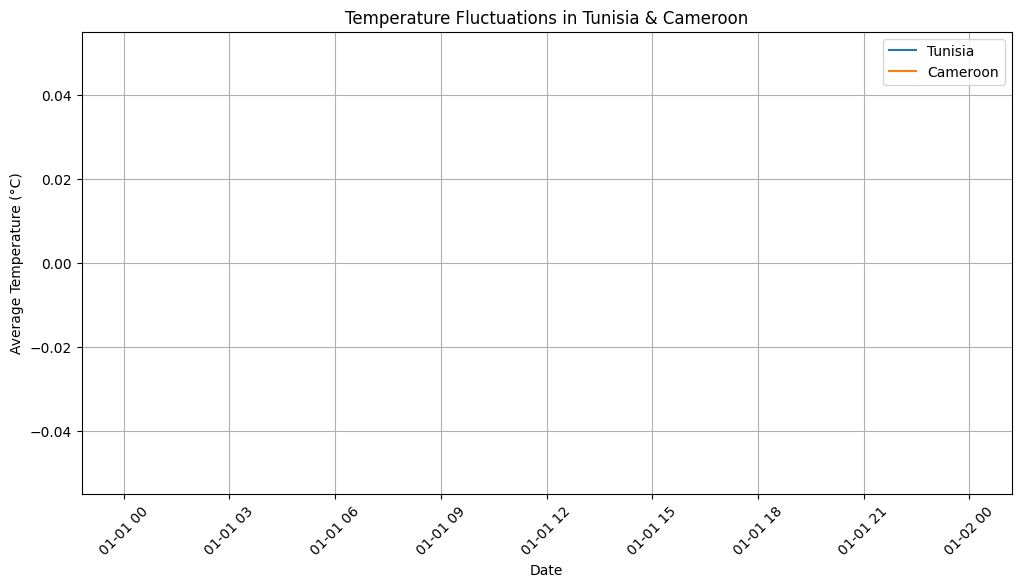

In [120]:
import matplotlib.pyplot as plt

# Initialize the figure correctly
plt.figure(figsize=(12, 6))

# Loop through each country and plot temperature trends
for country in ["Tunisia", "Cameroon"]:
    subset = df_grouped[df_grouped["country"] == country]
    plt.plot(subset["date"], subset["tavg"], label=country)

# Customize the chart
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.title("Temperature Fluctuations in Tunisia & Cameroon")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


## 4. Zoom in to only include data between 1980 and 2005, try to customize the axes labels.

In [122]:
df_filtered = df[(df["date"] >= "1980-01-01") & (df["date"] <= "2005-12-31")]


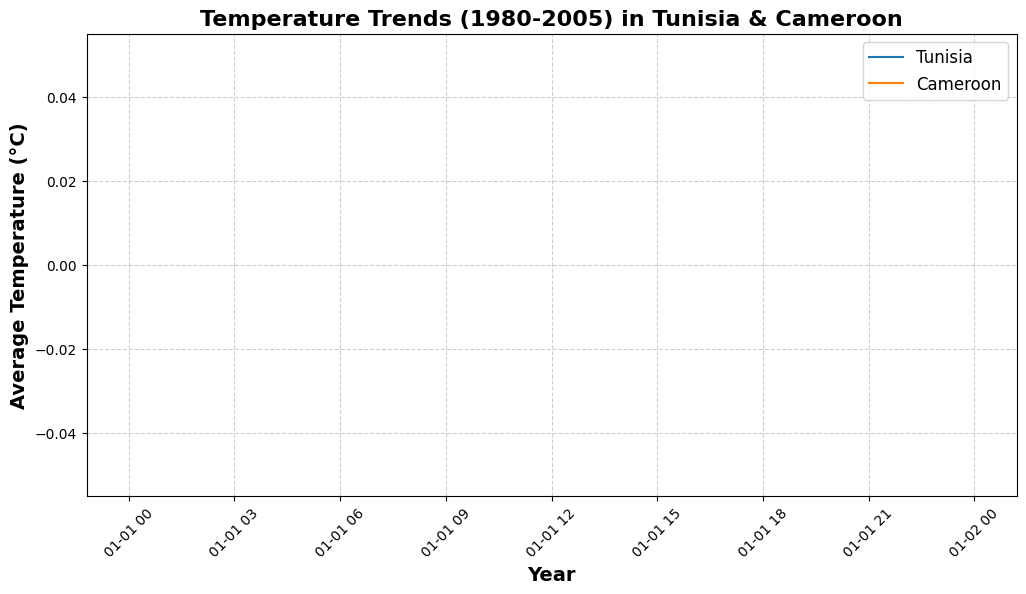

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot trends for Tunisia & Cameroon
for country in ["Tunisia", "Cameroon"]:
    subset = df_filtered[df_filtered["country"] == country]
    plt.plot(subset["date"], subset["tavg"], label=country)

# Customize the axis labels & title
plt.xlabel("Year", fontsize=14, fontweight="bold")  # Custom x-axis label
plt.ylabel("Average Temperature (°C)", fontsize=14, fontweight="bold")  # Custom y-axis label
plt.title("Temperature Trends (1980-2005) in Tunisia & Cameroon", fontsize=16, fontweight="bold")

# Improve visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True, linestyle="--", alpha=0.6)  # Soft grid lines
plt.legend(fontsize=12)

# Show the plot
plt.show()


## 5. Create Histograms to show temperature distribution in Senegal between [1980,2000] and  [2000,2023] (in the same figure). Describe the obtained results.

In [124]:
df_senegal = df[df["country"] == "Senegal"]  # Filter Senegal data

# Convert date column to datetime format
df_senegal["date"] = pd.to_datetime(df_senegal["date"], errors="coerce")

# Filter two time periods
df_1980_2000 = df_senegal[(df_senegal["date"] >= "1980-01-01") & (df_senegal["date"] <= "2000-12-31")]
df_2000_2023 = df_senegal[(df_senegal["date"] >= "2000-01-01") & (df_senegal["date"] <= "2023-12-31")]


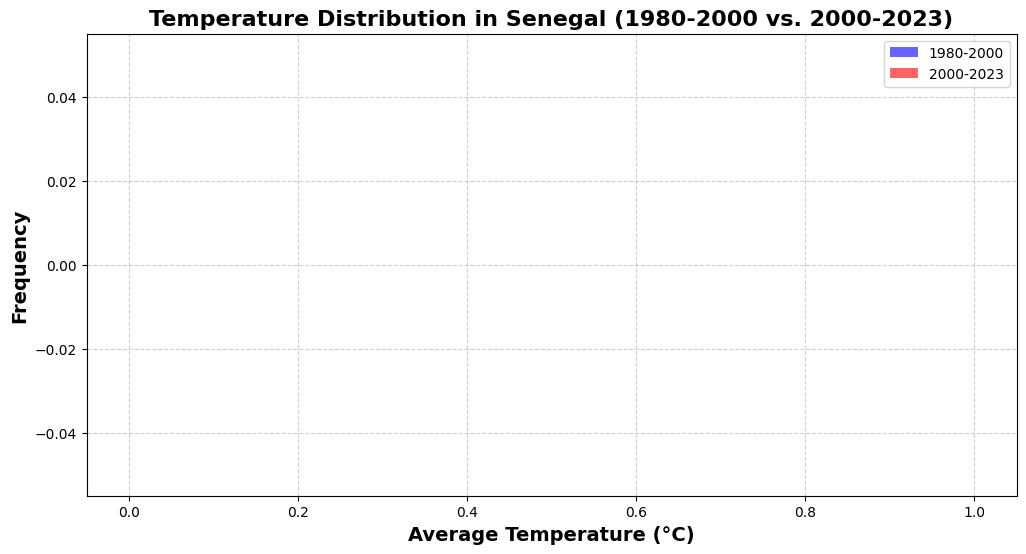

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot histogram for 1980-2000
plt.hist(df_1980_2000["tavg"], bins=30, alpha=0.6, color="blue", label="1980-2000")

# Plot histogram for 2000-2023
plt.hist(df_2000_2023["tavg"], bins=30, alpha=0.6, color="red", label="2000-2023")

# Customize the chart
plt.xlabel("Average Temperature (°C)", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.title("Temperature Distribution in Senegal (1980-2000 vs. 2000-2023)", fontsize=16, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


## 6. Select the best chart to show the Average temperature per country.

Bar Charts will best show or compare average temperatures across the countries.

Sinces it shows precise temperature values with clear bar heights creates for better view and better results.

## 7. Make your own questions about the dataset and try to answer them using the appropriate visuals.

*(i) Does temperature affect rain fall*
